In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
import os
from tqdm import tqdm
from concurrent.futures import ProcessPoolExecutor
import matplotlib
matplotlib.rcParams['font.family'] = 'Helvetica'

In [107]:
df_structures = pd.read_excel('count_fcc_fractions_byPalette.xlsx')
df_properties = pd.read_excel(
    'v6_Fe_Cr_Ni_Co_V_SSS_FCC_byCompo_wt_pct_ML_fcc_edit.xlsx')

fig_name = 'v6_Fe_Cr_Ni_Co_V_SSS_FCC_byCompo_wt_pct_ML_fcc_edit'

df_structures_Gmin_sort = df_structures.sort_values(
    by='Gmin_FCC_fraction', ascending=False)
df_structures_Gmineq_sort = df_structures.sort_values(
    by='Gmin_eq_FCC_fraction', ascending=False)

display(df_structures_Gmin_sort.head(2))
display(df_structures_Gmineq_sort.head(2))

display(df_properties.head(2))

,ABCDE,Gmin_FCC_fraction,eq_FCC_fraction,Gmin_eq_FCC_fraction,Unnamed: 4
62,Ni-Cr-Co-V-Fe,73.913043,49.275362,47.826087,x
97,Fe-V-Co-Cr-Ni,71.014493,36.231884,36.231884,NaN


,ABCDE,Gmin_FCC_fraction,eq_FCC_fraction,Gmin_eq_FCC_fraction,Unnamed: 4
111,Fe-Ni-Co-Cr-V,59.420290,50.724638,50.724638,NaN
110,Fe-Ni-Co-V-Cr,57.971014,55.072464,50.724638,NaN


,Unnamed: 0.1,Unnamed: 0,Fe,Cr,Ni,Co,V,ShearModulus_eff,PoissonsRatio_eff,delta_prime_misfit,...,sigma_SSS_FCC,compo_A_B_C_D_E,H1_new_pred_KFold_mean,H1_new_pred_KFold_std,C2_new_pred_KFold_mean,C2_new_pred_KFold_std,H1_new_pred_KFold_mean_FCC,H1_new_pred_KFold_std_FCC,C2_new_pred_KFold_mean_FCC,C2_new_pred_KFold_std_FCC
0,0,0,34.167395,2.891940,5.441344,13.111107,44.388214,63.740744,0.329844,0.092273,...,NaN,V-Co-Ni-Cr-Fe,501.462250,121.009743,299.628906,225.678894,NaN,NaN,NaN,NaN
1,1,1,40.204113,4.798947,5.417690,11.966268,37.612981,66.837689,0.322980,0.091240,...,NaN,V-Co-Ni-Cr-Fe,492.357391,119.546692,312.933289,225.030975,NaN,NaN,NaN,NaN


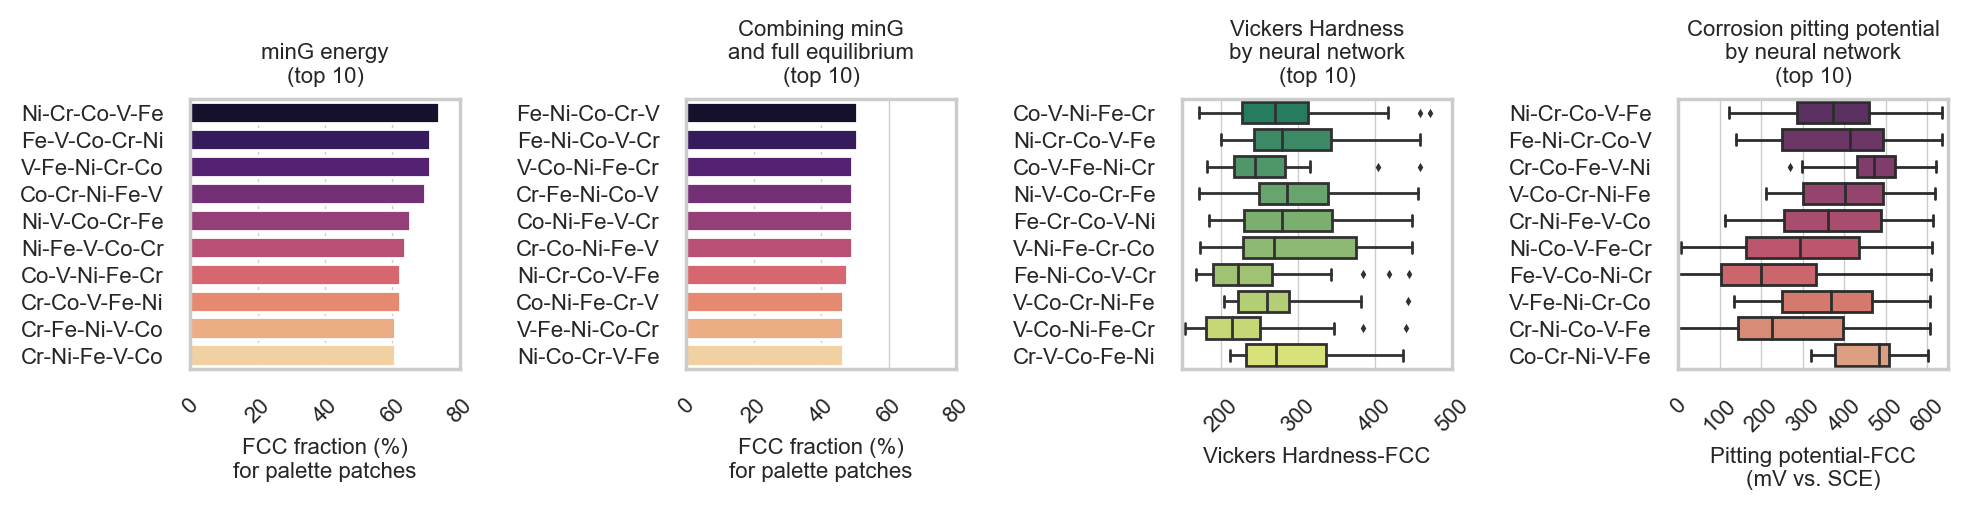

In [108]:
sns.set_theme(style="whitegrid", rc={"axes.grid": True, "grid.linewidth": 0.5})
fig, axs = plt.subplots(ncols=4, figsize=(10, 4), dpi=200)
font_size = 8

#
sns.barplot(y='ABCDE', x='Gmin_FCC_fraction', data=df_structures_Gmin_sort.head(
    10), linewidth=1, ax=axs[0], palette="magma")
axs[0].set_title("minG energy\n(top 10)", fontsize=font_size)
axs[0].set_xlabel('FCC fraction (%)\nfor palette patches', fontsize=font_size)
axs[0].set_ylabel('')
axs[0].set_xlim([0, 80])
axs[0].set_xticks(range(0, 81, 20))  # Fixed the range here
axs[0].tick_params(axis='x', rotation=45)
axs[0].tick_params(axis='both', labelsize=font_size)
axs[0].set_box_aspect(1)


#
sns.barplot(y='ABCDE', x='Gmin_eq_FCC_fraction', data=df_structures_Gmineq_sort.head(
    10), linewidth=1, ax=axs[1], palette="magma")
axs[1].set_title("Combining minG\nand full equilibrium\n(top 10)",
                 fontsize=font_size)
axs[1].set_xlabel('FCC fraction (%)\nfor palette patches',
                  fontsize=font_size)
axs[1].set_ylabel('')
axs[1].set_xlim([0, 80])
axs[1].set_xticks(range(0, 81, 20))  # Fixed the range here
axs[1].tick_params(axis='x', rotation=45)
axs[1].tick_params(axis='both', labelsize=font_size)
axs[1].set_box_aspect(1)

#
H1_max_values = df_properties.groupby('compo_A_B_C_D_E')[
    'H1_new_pred_KFold_mean_FCC'].max()
H1_sorted_groups = H1_max_values.sort_values(ascending=False).head(10).index
sns.boxplot(x="H1_new_pred_KFold_mean_FCC", y="compo_A_B_C_D_E", data=df_properties,
            linewidth=1, fliersize=1, palette="summer", order=H1_sorted_groups, ax=axs[2])
axs[2].set_title(
    'Vickers Hardness\nby neural network\n(top 10)', fontsize=font_size)
axs[2].set_xlabel('Vickers Hardness-FCC', fontsize=font_size)
axs[2].set_ylabel(None)
# axs[2].set_yticklabels([])
axs[2].set_xticks(range(0, 501, 100))
axs[2].set_xlim([150, 500])
axs[2].tick_params(axis='x', rotation=45)
axs[2].tick_params(axis='both', labelsize=font_size)
axs[2].set_box_aspect(1)

#
C2_max_values = df_properties.groupby('compo_A_B_C_D_E')[
    'C2_new_pred_KFold_mean_FCC'].max()
C2_sorted_groups = C2_max_values.sort_values(ascending=False).head(10).index
sns.boxplot(x="C2_new_pred_KFold_mean_FCC", y="compo_A_B_C_D_E", data=df_properties,
            linewidth=1, fliersize=1, palette="flare_r", order=C2_sorted_groups, ax=axs[3])
axs[3].set_title(
    'Corrosion pitting potential\nby neural network\n(top 10)', fontsize=font_size)
axs[3].set_xlabel('Pitting potential-FCC\n(mV vs. SCE)',
                  fontsize=font_size)
axs[3].set_ylabel(None)
axs[3].set_xticks(range(0, 801, 100))
axs[3].set_xlim([0, 650])
axs[3].tick_params(axis='x', rotation=45)
axs[3].tick_params(axis='both', labelsize=font_size)
axs[3].set_box_aspect(1)

plt.tight_layout()
plt.savefig(fig_name+'.pdf', bbox_inches='tight')
plt.show()